# Числовые операции над массивами

Этот ноутбук является переводом раздела [Numerical operations on arrays](https://scipy-lectures.org/intro/numpy/operations.html) из онлайн-курса [scipy-lectures](https://scipy-lectures.org/)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

## Поэлементные операции

### Базовые операции

Операции со скалярами

In [ ]:
a = np.array([1, 2, 3, 4])  
a + 1 

array([2, 3, 4, 5])

In [ ]:
2**a 

array([ 2,  4,  8, 16])

Арифметические операции поэлементно

In [ ]:
b = np.ones(4) + 1 
a - b 

array([-1.,  0.,  1.,  2.])

In [ ]:
a * b # умножение элементов первого массива на элементы второго массива

array([2., 4., 6., 8.])

In [ ]:
j = np.arange(5)
2 ** (j + 1) - j

array([ 2,  3,  6, 13, 28])

Данные операции выполняются быстрее, чем стандартные операции в python

In [ ]:
a = np.arange(10000)
%timeit a + 1

The slowest run took 18.56 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 5.49 µs per loop


In [ ]:
l = range(10000)
%timeit [i + 1 for i in l]

1000 loops, best of 5: 1.64 ms per loop


*Умножение массивов не является умножением матриц*

In [ ]:
c = np.ones((3, 3))
c * c 

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

*Примечание:* Матричное умножение выполняет метод `.dot`

In [ ]:
c.dot(c)

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

### **Упражнение: Поэлементные операции**

- Попробуйте выполнить простые арифметические поэлементные операции: сложить четные элементы с нечетными.
- Сравните их по времени с выполнения с командами на чистом python с помощью %timeit.
- Сгенерируйте:
```
[2**0, 2**1, 2**2, 2**3, 2**4]
a_j = 2^(3*j) - j
```

### Другие операции

Операции сравнения элементов массивов

In [ ]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

array([False,  True, False,  True])

In [ ]:
a > b

array([False, False,  True, False])

Операции сравнения массивов

In [ ]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])
np.array_equal(a, b)

False

In [ ]:
np.array_equal(a, c)

True

Логические операции

In [ ]:
a = np.array([1, 1, 0, 0], dtype = bool)
b = np.array([1, 0, 1, 0], dtype = bool)
np.logical_or(a, b)

array([ True,  True,  True, False])

In [ ]:
np.logical_and(a, b)

array([ True, False, False, False])

Трансцендентные функции

In [ ]:
a = np.arange(5)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [ ]:
np.log(a)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436])

In [ ]:
np.exp(a)

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

Несоответствие размерностей массивов вызовет ошибку

In [ ]:
a = np.arange(4)
a + np.array([1, 2])

ValueError: ignored

Транспонирование

In [ ]:
a = np.triu(np.ones((3, 3)), 1)
a

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [ ]:
a.T

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.]])

  ❗*Примечание:* траспонирование возврачает представление исходного массива, а не новый массив

In [ ]:
a = np.arange(9).reshape(3, 3)
a.T[0, 2] = 999
a.T

array([[  0,   3, 999],
       [  1,   4,   7],
       [  2,   5,   8]])

In [ ]:
a

array([[  0,   1,   2],
       [  3,   4,   5],
       [999,   7,   8]])

### Упражнение: Другие операции

- Посмотрите справку для `np.allclose`. Когда команда может быть полезна?
- Посмотрите справку для `np.triu` и `np.tril`.

## Базовые сокращения

### Вычисление суммы

In [ ]:
x = np.array([1, 2, 3, 4])
np.sum(x)

10

In [ ]:
x.sum()

10

Сумма по столбцам и строкам.  
Рассмотрим следующий массив   

![](https://scipy-lectures.org/_images/reductions.png)

In [ ]:
x = np.array([[1, 1], [2, 2]])
x

array([[1, 1],
       [2, 2]])

In [ ]:
x.sum(axis=0)   # столбцы (первая размерность)

array([3, 3])

In [ ]:
x[:, 0].sum(), x[:,1].sum()

(3, 3)

In [ ]:
x.sum(axis=1)   # строки (вторая размерность)

array([2, 4])

In [ ]:
x[0, :].sum(), x[1, :].sum()

(2, 4)

То же самое, но с большим количеством размерностей

In [ ]:
x = np.random.rand(2, 2, 2)
x.sum(axis=2)[0,1]

0.1278930811894503

In [ ]:
x[0, 1, :].sum()

0.1278930811894503

### Другие сокращения

Экстремумы:

In [ ]:
x = np.array([1, 3, 2])
x.min()

1

In [ ]:
x.max()

3

In [ ]:
x.argmin()      # индекс минимального элемента

0

In [ ]:
x.argmax()      # инлекс максимального элемента

1

Логические операции:

In [ ]:
np.all([True, True, False])

False

In [ ]:
np.any([True, True, False])

True

*Примечание:* Могут быть использованы для сравнения массивов:

In [ ]:
a = np.zeros((100, 100))
np.any(a != 0)

False

In [ ]:
np.all(a == a)

True

In [ ]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])
( (a <= b) & (b <= c) ).all()

True

Статистика:

In [ ]:
x = np.array([1, 2, 3, 1])
y = np.array([[1, 2, 3], [5, 6, 1]])
x.mean()

1.75

In [ ]:
np.median(x)

1.5

In [ ]:
np.median(y, axis=-1)     # последняя ось

array([2., 5.])

In [ ]:
x.std()     # стандартное отклонение генеральной совокупности

0.82915619758885

... и много чего ещё (лучше учиться на ходу)

### **Упражнение: Сокращения**

- Учитывая рассмотренную функцию `sum`, какую еще функции можно использовать в numpy?
- В чем разница между `sum` и `cumsum`?

### Пример из практики: диффузия с использованием алгоритма случайного блуждания
![](https://scipy-lectures.org/_images/random_walk.png)

Рассмотрим простой одномерный процесс случайного блуждания: (модель абсолютно пьяного человека) на каждом временном шаге человек может сделать либо шаг вправо, либо влево с равной вероятностью.
Необходимо найти расстояние от начала координат случайного "ходока" после t шагов влево или вправо. Мы смоделируем множество "ходока", чтобы найти зависимость. Для создадим двумерный массив с "историями" шагов (у каждого человека своя история):

![](https://scipy-lectures.org/_images/random_walk_schema.png)

In [ ]:
n_stories = 1000 # количество ходоков
t_max = 200      # время, в течение которого мы наблюдаем за ходоком

# случайным образом выбираем шаги 1 или -1
t = np.arange(t_max)
steps = 2 * np.random.randint(0, 1 + 1, (n_stories, t_max)) - 1
np.unique(steps) # Проверка: все шаги равны 1 или -1

array([-1,  1])

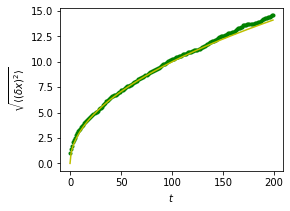

In [ ]:
# вычислем накопленные отклонения позиции, суммируя шаги по времени:
positions = np.cumsum(steps, axis=1) # axis = 1: размерность времени
sq_distance = positions**2

# получаем среднее значение по оси историй:
mean_sq_distance = np.mean(sq_distance, axis=0)

# строим график с результатом
plt.figure(figsize=(4, 3)) 
plt.plot(t, np.sqrt(mean_sq_distance), 'g.', t, np.sqrt(t), 'y-') 
plt.xlabel(r"$t$") 
plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$") ;
#plt.tight_layout() # опция для выделения достаточного пространство пространства для подписей

Наблюдаем хорошо известный результат в физике: среднеквадратичное отклонение растет как квадратный корень из времени!

## Трансляции (broadcasting)

Основные операции с массивами numpy выполняются поэлементно;  
Работа происходит с массивами одинакового размера. 

Тем не менее, возможно совершать операции нам массивами различных размеров если NumPy может преобразовывать эти массивы, так чтобы они имели один размер. Такое преобразование называется *трансляцией* (*broadcasting*).

![](https://scipy-lectures.org/_images/numpy_broadcasting.png)

Проверим

In [ ]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [ ]:
b = np.array([0, 1, 2])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

Мы уже использовали трансляции не зная этого.

In [ ]:
a = np.ones((4, 5))
a[0] = 2  # мы приравниваем к массиву с индексом "0" массив размерности 1
a

array([[2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

Полезный трюк:

In [ ]:
a = np.arange(0, 40, 10)
a.shape, a

((4,), array([ 0, 10, 20, 30]))

In [ ]:
a = a[:, np.newaxis]  # добавляем новую ось -> 2D массив
a.shape, a

((4, 1), array([[ 0],
        [10],
        [20],
        [30]]))

In [ ]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

Такими трансляциями уместно пользоваться, когда решается задача, где размерность выходных данные массива намного больше, чем входных.

### Пример из практики: Преобразования.

Построим массив расстояний (в милях) между городами маршрута 66: Чикаго, Спрингфилд, Сент-Луис, Талса, Оклахома-Сити, Амарилло, Санта-Фе, Альбукерке, Флагстафф и Лос-Анджелес.

![](https://scipy-lectures.org/_images/route66.png)

In [ ]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544,
       1913, 2448])
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

Многие сеточные задачи могут быть так же решены с помощью трансляций. К примеру, если мы хотим вичислить дистанцию от начала координат точек на сетке 5x5, мы можем сделать:

In [ ]:
x, y = np.arange(5), np.arange(5)[:, np.newaxis]
distance = np.sqrt(x ** 2 + y ** 2)
distance

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])

Или в цвете

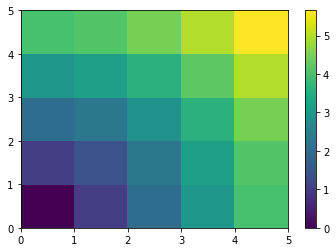

In [ ]:
plt.pcolor(distance)    
plt.colorbar();

*Примечания*: Функция `numpy.ogrid()` позволяет напрямую создавать векторы x и y из предыдущего примера с двумя ортогональными индексами.

In [ ]:
x, y = np.ogrid[0:5, 0:5]
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]]))

In [ ]:
x.shape, y.shape

((5, 1), (1, 5))

In [ ]:
distance = np.sqrt(x ** 2 + y ** 2)
distance

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])

`np.ogrid` очень полезен, когда нам приходится производить вычисления на сетке. С другой стороны, `np.mgrid` напрямую генерирует матрицы, заполненные индексами, для случаев.

In [ ]:
x, y = np.mgrid[0:4, 0:4]
x

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

In [ ]:
y

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

## Изменение формы массива

### Снижение размерности

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [ ]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

Для более высоких размерностей: последние имерения вытягиваются к “первому”.

In [ ]:
np.array([[[1, 2, 3], [4, 5, 6]],[[7, 8, 9], [0, 0, 0]]]).ravel()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 0])

### Изменение формы

С помощью функции `reshape()` можно добавлять или удалять размерности в массиве, а также изменять количество элементов в каждой размерности. Например, можно преобразовать одномерный массив в многомерный (но не наоборот!).

Операция, обратная выравниванию:

In [ ]:
a.shape

(2, 3)

In [ ]:
b = a.ravel()
b = b.reshape((2, 3))
b

array([[1, 2, 3],
       [4, 5, 6]])

или 

In [ ]:
a.reshape((2, -1))       # выводится неопределенное значение (-1)

array([[1, 2, 3],
       [4, 5, 6]])

❗**Внимание! `ndarray.reshape` может вернуть как представление (см. help(np.reshape))), так и копию**

In [ ]:
b[0, 0] = 99
a

array([[99,  2,  3],
       [ 4,  5,  6]])

In [ ]:
a = np.zeros((3, 2))
b = a.T.reshape(3*2)
b[0] = 9
a

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

### Добавление новых измерений

Индексация с помощью объекта `np.newaxis` позволяет нам добавлять ось в массив (вы уже видели это выше в разделе broadcasting):

In [ ]:
z = np.array([1, 2, 3])
z

array([1, 2, 3])

In [ ]:
z[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [ ]:
z[np.newaxis, :]

array([[1, 2, 3]])

### Перестановка индексов 

In [ ]:
a = np.arange(4*3*2).reshape(4, 3, 2)
a.shape

(4, 3, 2)

In [ ]:
a[0, 2, 1]

5

In [ ]:
b = a.transpose(1, 2, 0)
b.shape

(3, 2, 4)

In [ ]:
b[2, 1, 0]

5

Эта команда также создает представление, а не копию:

In [ ]:
b[2, 1, 0] = -1
a[0, 2, 1]

-1

### Изменение размера



Размер массива можно изменить с помощью `ndarray.resize:`

In [ ]:
a = np.arange(4)
a.resize((8,))
a

array([0, 1, 2, 3, 0, 0, 0, 0])

Однако на него нельзя ссылаться где-то еще:

In [ ]:
b = a
a.resize((4,)) 

ValueError: ignored

### **Упражнение: Преобразования формы**

- Изучите справку команды `reshape`, особенно обратите внимание на раздел заметок, в котором содержится дополнительная информация о копиях и представлениях.
- Используйте `flatten` в качестве альтернативы `ravel`. В чем разница? (Подсказка: проверьте, какой из них возвращает представление, а какой - копию)
- Поэкспериментируйте с `transpose` для перестановки индексов.

## Сортировка данных

Сортировка по оси:

In [ ]:
a = np.array([[4, 3, 5], [1, 2, 1]])
b = np.sort(a, axis=1)  # метод numpy
b

array([[3, 4, 5],
       [1, 1, 2]])

*Примечание*: Сортирует каждую строку независимо!

Сортировка по месту:

In [ ]:
a.sort(axis=1)          # метод объекта array
a

array([[3, 4, 5],
       [1, 1, 2]])

Сортировка с индексацией по маске:

In [ ]:
a = np.array([4, 3, 1, 2])
j = np.argsort(a)
j

array([2, 3, 1, 0])

In [ ]:
a[j]

array([1, 2, 3, 4])

Нахождение минимума и максимума:

In [ ]:
a = np.array([4, 3, 1, 2])
j_max = np.argmax(a)
j_min = np.argmin(a)
j_max, j_min

(0, 2)

### **Упражнение: Сортировка**

- Попробуйте сортировку по месту и обычную.
- Попробуйте создать массивы с различными типами данных `dtypes` и отсортировать их.
- Используйте `all` или `array_equal` для проверки результатов.
- Посмотрите как с `np.random.shuffle` создать быстрый сортируемый ввода.
- Скомбинируйте команды `ravel`, `sort` и `reshape`.
- Посмотрите на ключевое слово `axis` для `sort` и перепишите предыдущее упражнение.

## Заключение

**Что нужно знать, чтобы начать?**
* Знать, как создавать массивы: `array`, `arange`, `ones`, `zeros`.

* Получать форму массива с помощью `array.shape`, после чего использовать срезы, чтобы получить различные виды массива: `array[::2]`, и т. д. Регулировать форму массива, используя `reshpe` или понижать размерность, используя `ravel`.

* Получать подмножество элементов массива и/или модифицировать их значения с масками

`a[a < 0] = 0`

* Знать различные операции над массивами, такие как нахождение среднего или максимального (`array.max()`, `array.mean()`). Не нужно запоминать всё, но нужно уметь искать в документации (онлайн документация, `help()`, `lookfor()`!!!

* Для продвинутого использования: освоить индексацию по маске целых чиссел, а также трансляции. Знать больше о функциях NumPy, чтобы уметь работать с различными операциями над массивами